In [1]:
# Original Notebook

In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [69]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 58482 files belonging to 33 classes.


In [70]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'PD_VALID_DATA_HIST_EQ',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 14640 files belonging to 33 classes.


In [71]:
cnn = tf.keras.models.Sequential()

In [72]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [73]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [74]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [75]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [76]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [77]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [78]:
cnn.add(tf.keras.layers.Flatten())

In [79]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [80]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [81]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=33,activation='softmax'))

In [82]:
# cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#     learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [83]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 33)                  │          49,533 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,835,257 (29.89 MB)

 Trainable params: 7,835,257 (29.89 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 1765s 963ms/step - accuracy: 0.2574 - loss: 2.6037 - val_accuracy: 0.6751 - val_loss: 1.0148
Epoch 2/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 1690s 925ms/step - accuracy: 0.6731 - loss: 1.0294 - val_accuracy: 0.7546 - val_loss: 0.7604
Epoch 3/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 1683s 921ms/step - accuracy: 0.7787 - loss: 0.6756 - val_accuracy: 0.8100 - val_loss: 0.5659
Epoch 4/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 1530s 837ms/step - accuracy: 0.8428 - loss: 0.4775 - val_accuracy: 0.8378 - val_loss: 0.4984
Epoch 5/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 1480s 810ms/step - accuracy: 0.8822 - loss: 0.3425 - val_accuracy: 0.8577 - val_loss: 0.4408
Epoch 6/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 1475s 807ms/step - accuracy: 0.9096 - loss: 0.2565 - val_accuracy: 0.8776 - val_loss: 0.3838
Epoch 7/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 1568s 858ms/step - accuracy: 0.9322 - loss: 0.1964 - val_accuracy: 0.8540 - val_loss: 0.4574
Epoch 8/10
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 1717s 939ms/s

In [85]:
print('training done')

training done


In [86]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

1828/1828 ━━━━━━━━━━━━━━━━━━━━ 447s 245ms/step - accuracy: 0.9814 - loss: 0.0569
Training accuracy: 0.9831743240356445


In [87]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

458/458 ━━━━━━━━━━━━━━━━━━━━ 116s 253ms/step - accuracy: 0.8778 - loss: 0.4630
Validation accuracy: 0.8814207911491394


In [88]:
cnn.save('plant_disease_identifier_model_M1.keras')

In [89]:
print('saved .keras model')

saved .keras model


In [90]:
cnn.save('plant_disease_identifier_model_M1.h5')

In [91]:
training_history.history #Return Dictionary of history

{'accuracy': [0.4242843985557556,
  0.7050032615661621,
  0.7943982481956482,
  0.851988673210144,
  0.8902397155761719,
  0.91457200050354,
  0.9345268607139587,
  0.9470093250274658,
  0.9569610953330994,
  0.9617147445678711],
 'loss': [1.9356911182403564,
  0.9191440939903259,
  0.6218522191047668,
  0.4401858448982239,
  0.3191637694835663,
  0.24582114815711975,
  0.19019575417041779,
  0.15455113351345062,
  0.1279626190662384,
  0.11124846339225769],
 'val_accuracy': [0.6751366257667542,
  0.7546448111534119,
  0.8100410103797913,
  0.8378415107727051,
  0.8577185869216919,
  0.8775956034660339,
  0.8539617657661438,
  0.8793032765388489,
  0.8802595734596252,
  0.8814207911491394],
 'val_loss': [1.0148345232009888,
  0.7604292631149292,
  0.565924346446991,
  0.4983859062194824,
  0.4407709538936615,
  0.3838226795196533,
  0.4573723375797272,
  0.42585986852645874,
  0.4309185743331909,
  0.4515882134437561]}

In [92]:
#Recording History in json
import json
with open('training_hist_diseaseidentifierM1.json','w') as f:
  json.dump(training_history.history,f)

In [93]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


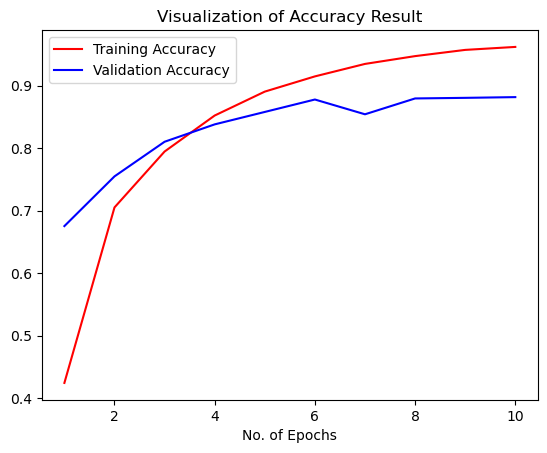

In [94]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [95]:
class_name = validation_set.class_names

In [96]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'PD_VALID_DATA_HIST_EQ',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 14640 files belonging to 33 classes.


In [97]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

14640/14640 ━━━━━━━━━━━━━━━━━━━━ 342s 23ms/step


In [98]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [99]:
Y_true

<tf.Tensor: shape=(14640,), dtype=int64, numpy=array([ 0,  0,  0, ..., 32, 32, 32], dtype=int64)>

In [100]:
predicted_categories

<tf.Tensor: shape=(14640,), dtype=int64, numpy=array([ 2,  2,  0, ..., 32, 32, 32], dtype=int64)>

In [101]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [102]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.74      0.90      0.81       504
                                 Apple___Black_rot       0.92      0.91      0.92       497
                          Apple___Cedar_apple_rust       0.91      0.89      0.90       440
                                   Apple___healthy       0.92      0.90      0.91       502
          Cherry_(including_sour)___Powdery_mildew       0.93      0.97      0.95       421
                 Cherry_(including_sour)___healthy       0.96      0.97      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.81      0.86       355
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.86      0.96      0.91       423
                            Corn_(maize)___healthy       0.89      0.57      0.

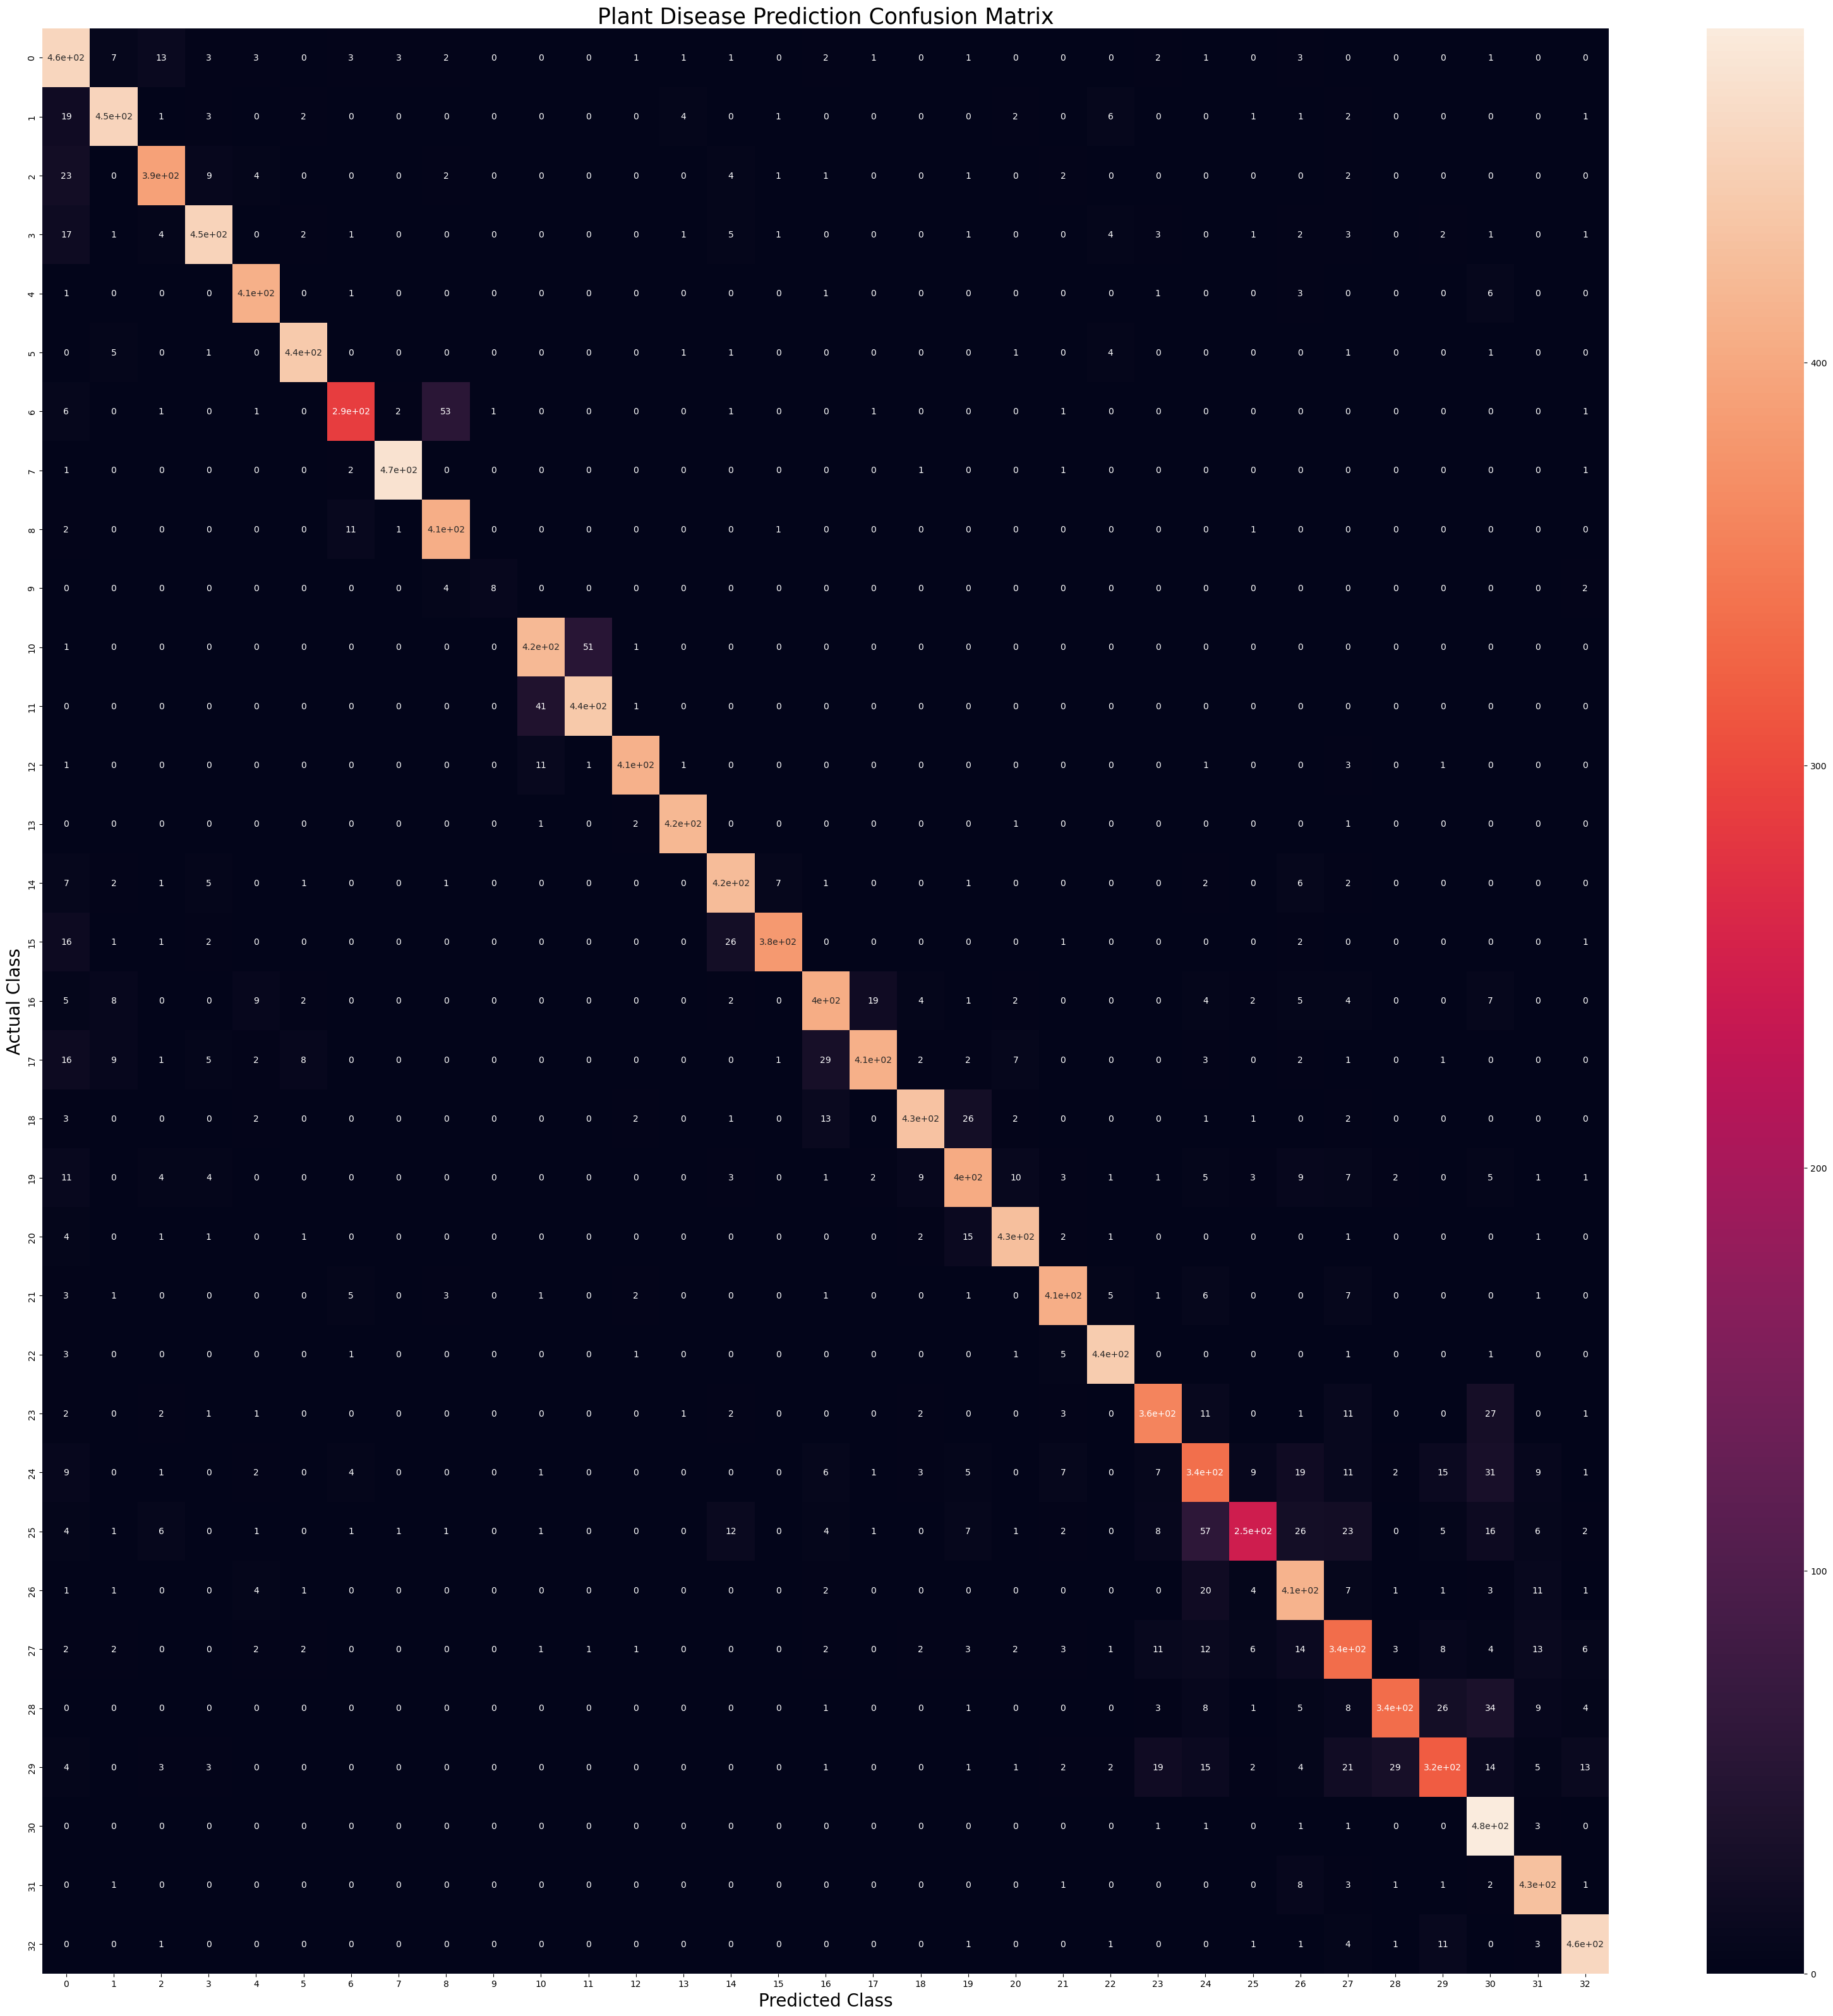

In [103]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()